Erik Hystad Week 2

Some feedback on mistakes, if it doesn't take you too much time, especially why Hubert chooses to sell when kg > 10
when simulations say that he should use brand 5.
## Level 1

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
set_size = 10000

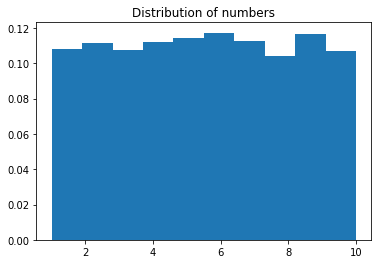

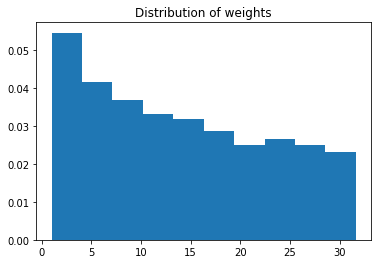

In [23]:
monte_carlo_rand_num = np.random.uniform(1, 10, set_size)
plt.hist(monte_carlo_rand_num, density=True)
plt.title("Distribution of numbers")
plt.show()

def m(x):
    return np.power(x, 1.5)

plt.hist(np.vectorize(lambda x: m(x))(monte_carlo_rand_num), density=True)
plt.title("Distribution of weights")
plt.show()

Mean value from 100 000 random numbers selling scraps: 9.819423607065918
Standard deviation: 6.276724917940584


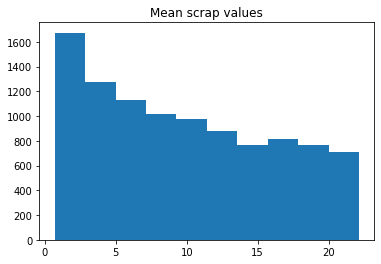

In [24]:
def selling_scraps_plot():
    values = np.vectorize(lambda x: m(x)*0.7)(monte_carlo_rand_num)
    monte_carlo_scrap_sim = np.mean(values)
    std = np.std(values)
    print("Mean value from 100 000 random numbers selling scraps:", monte_carlo_scrap_sim)
    print("Standard deviation:", std)
    plt.hist(values)
    plt.title("Mean scrap values")
    plt.show()

selling_scraps_plot()

Approximate $\approx$ 9.8


### Level 2


Mean value from 100 000 random numbers hanging with magic string: 103.86484452300284
Standard deviation: 1.4270781006058693


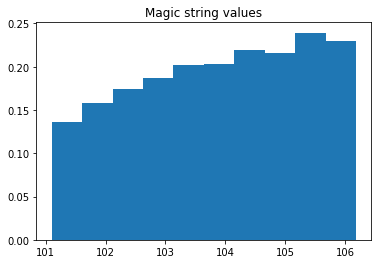

In [25]:
def BT_Fredriksen_price(x):
    return 100 + 1.1*np.sqrt(m(x))

def magic_string_plot():
    values = np.vectorize(lambda x: BT_Fredriksen_price(x))(monte_carlo_rand_num)
    hanging_magic_string_sum = np.mean(values)
    std = np.std(values)
    print("Mean value from 100 000 random numbers hanging with magic string:",hanging_magic_string_sum)
    print("Standard deviation:", std)
    plt.hist(values, density=True)
    plt.title("Magic string values")
    plt.show()

magic_string_plot()

Approximate $\approx$ 103.85

### Level 3

In [26]:
with open("../Data/brands.txt") as brands_table:
    table = brands_table.read()
brands_table = None

table = table.split()

i = 0
table_dict = {}
while i < len(table):
    table_dict[table[i]] = (eval(table[i+1]), eval(table[i+3]), eval(table[i+4]), eval(table[i+6]), eval(table[i+7]))
    i += 8
table_dict['0'] = (0,0)

In [27]:
def prob(m, lamb, k):
    y = -(m/(1+(np.abs(lamb))))**(1+np.abs(k))
    return 1 - np.exp(y)

def break_string(brand, m):
    if brand == '0':
        return False
    x = np.random.rand()
    k = np.random.normal(table_dict[brand][0], table_dict[brand][1], 1)[0]
    lamb = np.random.normal(table_dict[brand][2], table_dict[brand][3], 1)[0]
    return x >= prob(m, lamb, k)

def string_price(brand):
    return table_dict[brand][4] if brand != '0' else 0

In [28]:
def earnings_per_brand(nums):
    l = []
    for key in table_dict.keys():
        values = np.vectorize(lambda x: (BT_Fredriksen_price(x) if break_string(key, m(x))
                                        else m(x)*0.7)-string_price(key))(nums)
        earnings = np.mean(values)
        std = np.std(values)
        print("Brand:", key,"expected earnings:", earnings)
        print("Standard error:", std/np.sqrt(len(values)), '\n')
        l.append(earnings)

In [29]:
earnings_per_brand(monte_carlo_rand_num)

Brand: 1 expected earnings: 37.1789012850773
Standard error: 0.4323613602491645 

Brand: 2 expected earnings: 38.24314290521818
Standard error: 0.4389927799141416 

Brand: 3 expected earnings: 24.418239076569616
Standard error: 0.36193419552912287 

Brand: 4 expected earnings: 14.710412044493024
Standard error: 0.3630878434747496 

Brand: 5 expected earnings: 50.09167434402027
Standard error: 0.4341623459249328 

Brand: 6 expected earnings: 34.95370296149693
Standard error: 0.4270056304927513 

Brand: 7 expected earnings: 37.091848522575894
Standard error: 0.43332175837375564 

Brand: 8 expected earnings: 34.7375808107973
Standard error: 0.41337378337548986 

Brand: 9 expected earnings: 42.72851041216726
Standard error: 0.4387424299022248 

Brand: 10 expected earnings: 31.501344348724075
Standard error: 0.40055316534343105 

Brand: 0 expected earnings: 9.819423607065918
Standard error: 0.06276724917940583 



Brand 5 has the highest earnings with $\approx$ 50


In [30]:
def random_brand(x):
    y = np.random.randint(11)
    return (BT_Fredriksen_price(x) if break_string(str(y), m(x))
     else m(x)*0.7)-string_price(str(y))

def random_brand_plot():
    values = np.vectorize(lambda x: random_brand(x))(monte_carlo_rand_num)
    print("Expected value:", np.mean(values))
    print("Standard error:", np.std(values)/np.sqrt(len(values)))

random_brand_plot()
monte_carlo_rand_num = None

Expected value: 32.38193763407039
Standard error: 0.41294726811087024


The expected value of a uniformly random choice brand is $\approx$ 32.4, so Hubert shouldn't sell to the guy his guy knows!!


In [31]:
def hubert_take_steps(n, epsilon, alpha=0.01, max_bt_x_val=10, min_bt_x_val=1):
    avg_earnings = {}
    plot_earnings = {}
    for key in table_dict.keys():
        avg_earnings[key] = 0
        plot_earnings[key] = [0]

    reward = 0
    bts = np.random.uniform(min_bt_x_val, max_bt_x_val, n)
    for i, bt in enumerate(bts):
        p = np.random.rand()
        if i == 0 or p > 1-epsilon:
            max_key = str(np.random.randint(11))
        else:
            max_key = max(avg_earnings, key=avg_earnings.get)
        c_reward = (BT_Fredriksen_price(bt) if break_string(max_key, m(bt)) else m(bt)*0.7)- (string_price(max_key))
        reward += c_reward
        avg_earnings[max_key] += alpha*(c_reward-avg_earnings[max_key])
        plot_earnings[max_key].append(c_reward)
    return plot_earnings, avg_earnings, reward

In [32]:
def sim_n_steps(f, n):
    e_of_x = []
    t_of_x = []
    std_of_xp = []
    std_of_xm = []
    epsilon_values = []
    epsi = 0.0
    for i in range(9):

        plot_earnings, avg_earnings, reward = f(n, min(epsi, 1))
        plt.boxplot([plot_earnings[k] for k in plot_earnings.keys()], labels=plot_earnings.keys())
        plt.title("Reward distribution epsilon = " + str(min(epsi, 1)) + " and " + str(n) + " steps")
        plt.xlabel("Brand")
        plt.show()
        l = []
        for k in plot_earnings.keys():
            l.extend(plot_earnings[k])

        e = np.mean(l)
        t = np.sum(l)
        std = np.std(l)/np.sqrt(len(l))
        e_of_x.append(e)
        t_of_x.append(t)
        std_of_xp.append(e+std)
        std_of_xm.append(e-std)
        epsilon_values.append(min(epsi, 1))

        epsi = epsi * 2 if i != 0 else 0.0125
    plt.plot(epsilon_values, e_of_x)
    plt.title("Expected value per BT")
    plt.show()

    plt.plot(epsilon_values, e_of_x, label="Expected")
    plt.plot(epsilon_values, std_of_xp, label="Standard error+")
    plt.plot(epsilon_values, std_of_xm, label="Standard error-")
    plt.legend(loc="upper right")
    plt.title("With standard error")
    plt.show()

    plt.plot(epsilon_values, t_of_x)
    plt.title("Expected total value")
    plt.show()

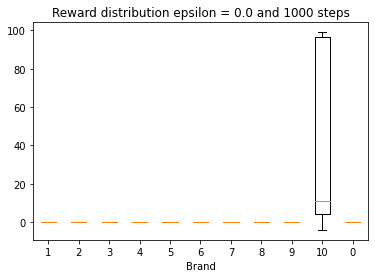

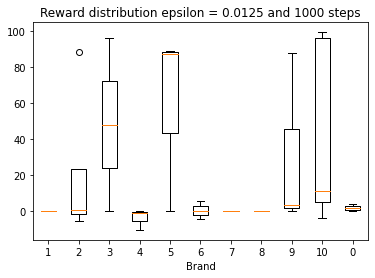

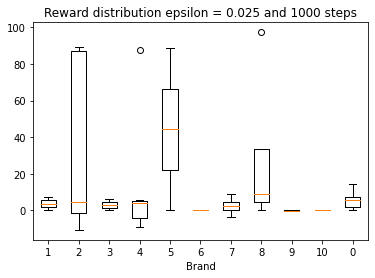

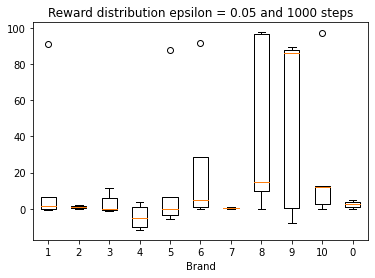

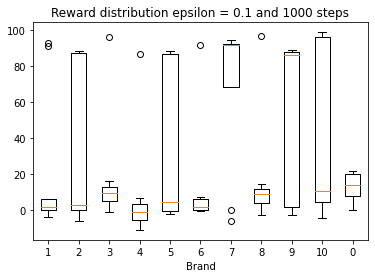

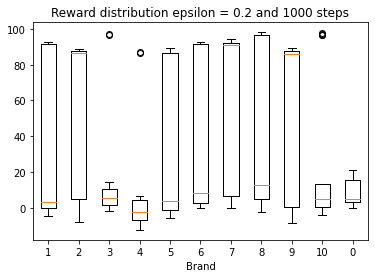

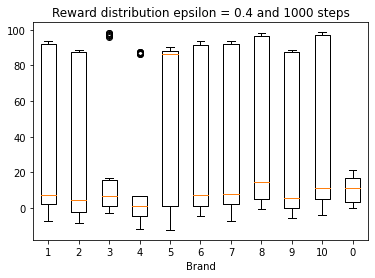

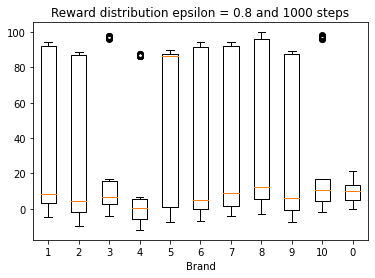

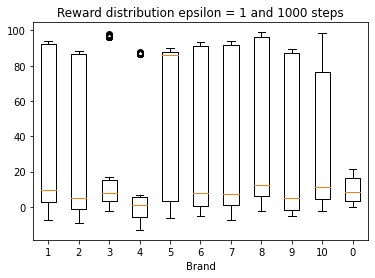

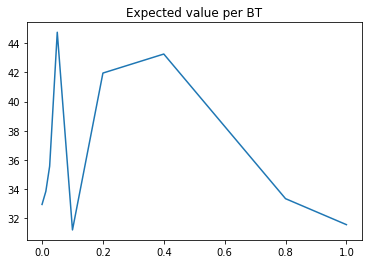

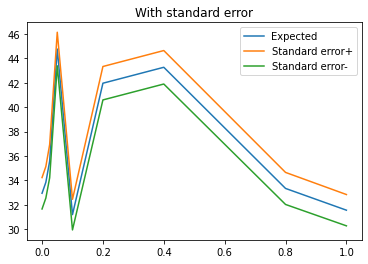

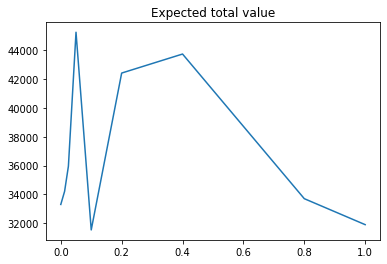

In [33]:
sim_n_steps(hubert_take_steps, 1000)

### Level 4

Epsilon = 0 is only greedy decisions, so Hubert will never explore and try new things, while
Epsilon = 1 is the opposite with Hubert only exploring, only taking random actions.

If Q1(a) was initialized to a more optimistic value it would then be able to start with Epsilon = 0
and choose new brands until it found the best one. With a high value it would try all brands until
one of the best averages was found.

According to my tests at 1000 BT's Hubert should aim for $\approx$ Epsilon = 0.2. Which would give him
earnings of $\approx$ 43kr per BT vs 34kr per BT when choosing at random. Lower Epsilon can give higher rewards, if it
is lucky with it's first guesses.

On smaller samples I think a higher Epsilon would help to find the best average faster, and maybe not
use brands with high standard deviation, so no taking as big risks since it could easily loose him money
in the short term.

On larger samples in this case it could be good to have a decreasing Epsilon so Hubert didn't waste time
exploring when he found the best brand, since the brands don't change in our example, if they did we shouldn't
decrease epsilon. A smaller epsilon so Hubert didn't loose as much money when he found a good solution, and
be willing to take risks since on average it could pay of in the long run.


In [34]:
#Plot choice distribution with 1000 steps
def plot_choices(f, max_bt_x_val=10, min_bt_x_val=1):
    plot_earnings, avg_earnings, reward = f(10000, 0.2, max_bt_x_val=max_bt_x_val, min_bt_x_val=min_bt_x_val)
    plt.bar(plot_earnings.keys(), [len(plot_earnings[k]) for k in plot_earnings.keys()])
    plt.title("Distribution of choices")
    plt.show()

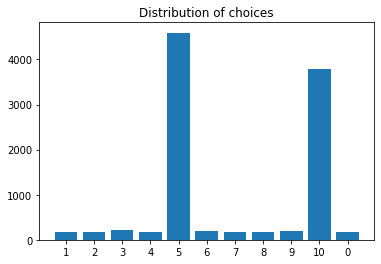

In [35]:
plot_choices(hubert_take_steps)

The distribution of choices can vary on 1000 samples, so i plotted with 10 000 to show best strategy,
brand 5.
So no real surprises.

### Level 5

This could help him choose string brand because some brands work better at higher weights, brand 9 for example works
 better on lighter weights than brand 5. He could keep track of 2 different average
values for > 10 and < 10 and first weigh the BT, then he choose which brand. Here it would
be smart to use different epsilon depending on the distribution of the BT's. This could lead to the combination of two
new brands being the best.

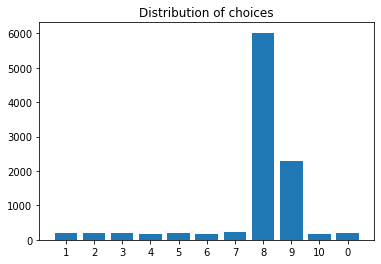

In [36]:
plot_choices(hubert_take_steps, max_bt_x_val=4.6)

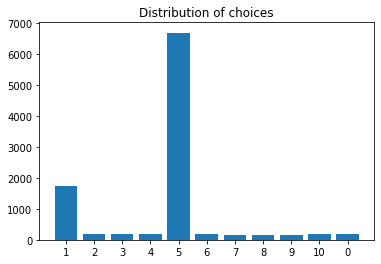

In [37]:
plot_choices(hubert_take_steps, min_bt_x_val=4.7)

In [38]:
print("Earnings per brand less than 10kg \n")
earnings_per_brand(np.random.uniform(1, 4.6, 1000))
print()
print("Earnings per brand more than 10kg \n")
earnings_per_brand(np.random.uniform(4.7, 10, 1000))


Earnings per brand less than 10kg 

Brand: 1 expected earnings: 78.6763892511762
Standard error: 1.0632493244070769 

Brand: 2 expected earnings: 82.28861314741259
Standard error: 0.6774487349202326 

Brand: 3 expected earnings: 49.30015834846724
Standard error: 1.535148381647105 

Brand: 4 expected earnings: 37.77178953351654
Standard error: 1.5318683054067654 

Brand: 5 expected earnings: 83.84095100025573
Standard error: 0.5697530958154039 

Brand: 6 expected earnings: 77.73887864497915
Standard error: 1.0894297152235635 

Brand: 7 expected earnings: 77.58436861386727
Standard error: 1.0992482366255412 

Brand: 8 expected earnings: 69.55887894540929
Standard error: 1.3839444855259369 

Brand: 9 expected earnings: 87.15495876117045
Standard error: 0.13713838243555185 

Brand: 10 expected earnings: 64.72890962818252
Standard error: 1.4482765232863752 

Brand: 0 expected earnings: 3.4531146829504937
Standard error: 0.0570952584503635 


Earnings per brand more than 10kg 

Brand: 1 expe

Here I can see that there is some kind bug in the agent since Hubert is choosing to sell, even though brand 5 is supposed
to be better.

In [39]:
#Ugly implementation... :(
def hubert_take_steps_wit_weight_scale(n, epsilon, alpha=0.01, max_bt_x_val=10, min_bt_x_val=1):
    avg_earnings_less_than_10 = {}
    plot_earnings = {}
    avg_earnings_more_than_10 = {}
    for key in table_dict.keys():
        avg_earnings_less_than_10[key] = 0
        plot_earnings[key] = []
        avg_earnings_more_than_10[key] = 0


    reward = 0
    bts = np.random.uniform(min_bt_x_val, max_bt_x_val, n)
    for i, bt in enumerate(bts):
        p = np.random.rand()
        if m(bt) > 10:
            avg_earnings = avg_earnings_more_than_10
        else:
            avg_earnings = avg_earnings_less_than_10
        if i == 0 or p > 1-epsilon:
            max_key = str(np.random.randint(11))
        else:
            max_key = max(avg_earnings, key=avg_earnings.get)
        c_reward = (BT_Fredriksen_price(bt) if break_string(max_key, m(bt)) else m(bt)*0.7)- (string_price(max_key))
        reward += c_reward
        avg_earnings[max_key] += alpha*(c_reward-avg_earnings[max_key])
        plot_earnings[max_key].append(c_reward)
    return plot_earnings, (avg_earnings_less_than_10, avg_earnings_more_than_10), reward

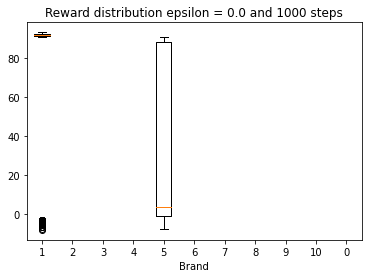

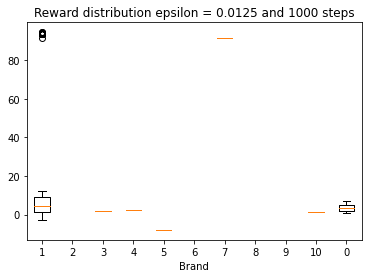

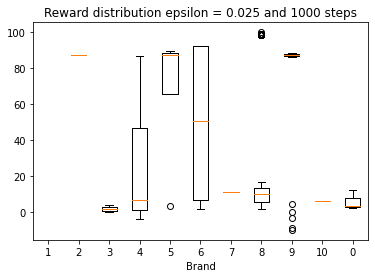

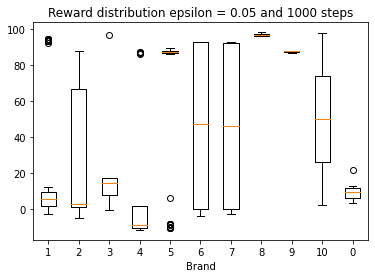

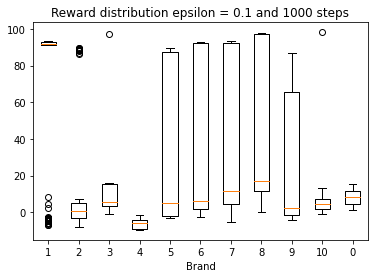

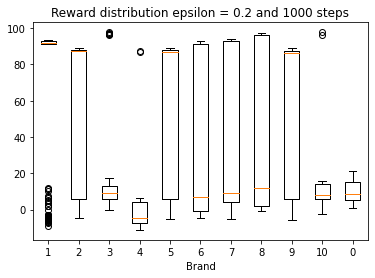

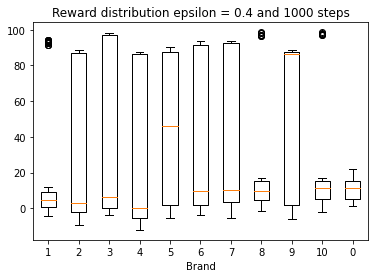

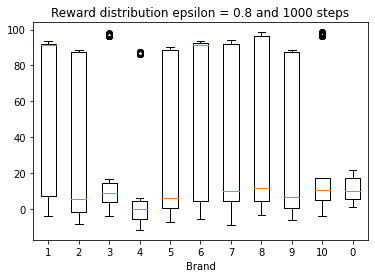

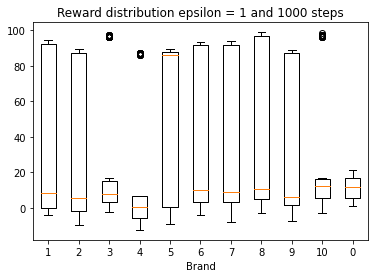

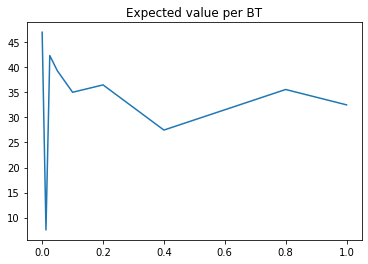

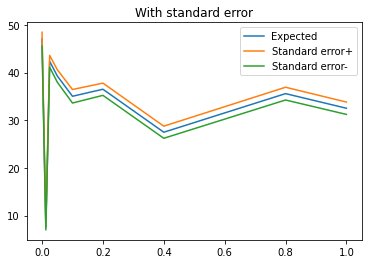

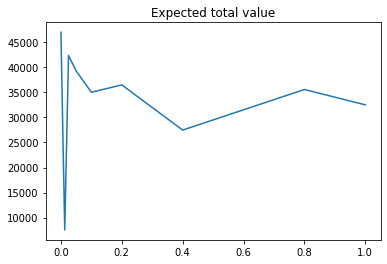

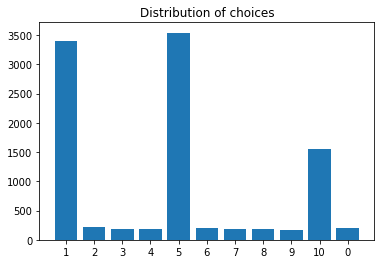

In [40]:
sim_n_steps(hubert_take_steps_wit_weight_scale, 1000)

plot_choices(hubert_take_steps_wit_weight_scale)
